In [1]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fig = plt.figure(figsize=(12,5))

<Figure size 864x360 with 0 Axes>

In [4]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
faces.data.shape  #(400,4096)
range(len(faces.data)) #(0,400)
klist = np.random.choice(range(len(faces.data)),10) #range(0,400)에서 임의의 수 10개 추출

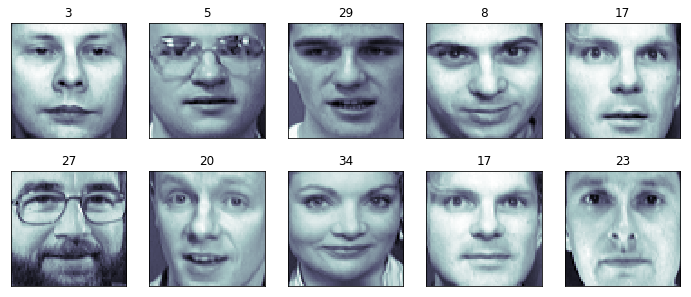

In [6]:
#2줄, 5칸 나누어 얼굴 이미지(klist의 번호에 해당하는 얼굴 이미지) 출력
fig = plt.figure(figsize=(12,5))
for i in range(2):
    for j in range(5):
        k = klist[i*5+j]
        ax = fig.add_subplot(2,5, i*5+j+1) #2줄 5칸
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        plt.title(faces.target[k])
        ax.yaxis.set_ticks([])
        ax.xaxis.set_ticks([])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

In [8]:
from sklearn.svm import SVC
model=SVC(kernel='linear').fit(xtrain,ytrain)

In [9]:
# faces.target #400개의 사진에 대한 label [0,0,...39,39]
# faces.images.shape #(400, 64, 64)
# faces.data.shape #(400, 4096)

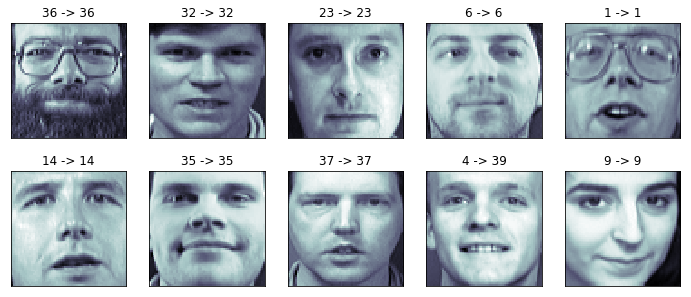

In [10]:
fig = plt.figure(figsize=(12,5))
klist = np.random.choice(range(len(ytest)),10) #160장 중에서 임의로 10개 추출

for i in range(2):
    for j in range(5):
        k = klist[i*5+j]
        ax = fig.add_subplot(2,5, i*5+j+1) #2줄 5칸
        ax.imshow(xtest[k:(k+1),:].reshape(64,64), cmap=plt.cm.bone)
        plt.title('%d -> %d' %(ytest[k],model.predict(xtest[k:(k+1),:])))
        ax.yaxis.set_ticks([])
        ax.xaxis.set_ticks([])
plt.show()

In [11]:
from sklearn.metrics import classification_report, accuracy_score
#scikit-learn.org
ypredtrain = model.predict(xtrain)
ypredtest = model.predict(xtest)

In [12]:
ypredtrain
ypredtest

array([13, 30, 34, 19, 24,  6, 23, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 12, 17, 31,  0,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17,  8, 10, 32,  0,  0, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0,  6, 19, 37, 14,  0,
        3, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36, 25, 16,
       31, 15, 28, 34,  8, 34,  3, 29,  9,  8, 29,  2, 36, 21, 25, 39, 23,
       34,  9, 22, 23, 23, 37, 14,  2, 25, 35, 16, 23, 12,  6, 24, 21, 10,
       31, 19, 32,  1, 16, 18,  3, 11, 26, 10, 35, 24, 23, 11, 33, 12, 28,
       11, 38, 13, 27, 12, 19, 29])

In [13]:
print(classification_report(ytrain,ypredtrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

In [14]:
print(classification_report(ytest,ypredtest))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         5
           6       0.83      0.83      0.83         6
           7       1.00      0.67      0.80         3
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       0.67      1.00      0.80         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         6
          15       1.00      0.33      0.50         6
          16       0.67      1.00      0.80         2
          17       1.00    

In [15]:
#confusion matrix(분류 평가표): 실제와 예측이 일치하는 개수 출력
#행-정답, 열-예측
from sklearn.metrics import confusion_matrix
xtrue = [2,0,2,2,0,1] #정답
xpred = [0,0,2,2,0,2] #예측값
confusion_matrix(xtrue,xpred)
#행-정답, 열-예측
# array([[2, 0, 0],  2: 정답이 0, 예측도 0
#        [0, 0, 1],  1: 정답이 1, 예측이 2
#        [1, 0, 2]]  1: 정답이 2, 예측이 0
#                    2: 정답이 2, 예측도 2

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [16]:
#양성:1, 음성:0
xtrue = [1,0,1,1,0,1]
xpred = [0,0,1,1,0,1]
confusion_matrix(xtrue,xpred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [17]:
confusion_matrix(xtrue,xpred, labels=(1,0))
# array([[3, 1],   3: 정답1, 예측1
#        [0, 2]]   2: 정답0, 예측0
#                  1: 예측0, 실제1
#                  0: 예측1, 실제0

array([[3, 1],
       [0, 2]], dtype=int64)

In [18]:
xtrue = [0,0,0,1,1,0,0]
xpred = [0,0,0,0,1,1,1]
print(classification_report(xtrue, xpred))
"""
0이라고 예측한 데이터의 75%만 실제로 0이었음
1이라고 예측한 데이터의 33%만 실제로 1이었음
실제 0인 데이터 중의 60%만 0으로 판별됨
실제 1인 데이터 중의 50%만 1로 판별됨
"""

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7

